# Statistical Analysis Techniques

Quick Navigate:
- [loading Data](#loading-data)
- [Handling Null Data](#handling-null-data)
- [Merging the Data](#merging-the-data-frames)
- [Analyzing a categorical variable (Gender)](#analyzing-one-categorical-variable-gender)
  - [Observation](#obseration)
- [Analyzing two categorical variables (Gender - Age groups)](#analyzing-two-categorical-variables-gender-age-groups)
  - [Obervation](#obseration)
- [Analyzing Numeric varible (height)](#analyzing-a-continious-variable-height)
  - [Obervation](#observation)
- [Analyzing a Categoric and numeric variable (Gender-Height)](#analyzing-a-categoric-and-numeric-variable-gender-height)
  - [Obervation](#observation)
- [Analyzing two numberic variables (height-weight)](#analyzing-two-numberic-variables-height-weight)
  - [Obervation](#observation)

## Loading modules

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## use display for html output
from IPython.display import display, HTML

# auto-reload modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
# dark theme
plt.style.use("dark_background")

In [101]:
GENDER_PALETTE = ['#42e3f5', '#ff78c2']

## Loading Data

The data is present in my workspace, inside the data folder I have two files namely howell1.csv & howell2.csv containing the data seperated by ';'.

## Observation

In [27]:
df_1 = pd.read_csv('./data/howell1.csv', sep=';')
df_2 = pd.read_csv('./data/howell2.csv', sep=';')

display(HTML(f'''
<table>
    <td>{df_1.head().to_html()}</td>
    <td>{df_2.head().to_html()}</td>
</table>
'''))

In [45]:
from utils import to_rows, display_in_grid

display_in_grid(data = [
    f"<table>{to_rows(df_1.isna().sum())}</table>",
    f"<table>{to_rows(df_2.isna().sum())}</table>"
])


height,0
weight,0
age,0
male,0
dtype:,int64
age,6
male,4
height,299
weight,232
dtype:,int64


## Handling null data

We don't need **age.at.death, alive** for this project, therefore we will remove it from the data.

In [29]:
df_2.drop(['age.at.death', 'alive'], axis=1, inplace=True)
df_2.head()

,age,male,height,weight
0,63.0,1.0,151.765,47.825606
1,63.0,0.0,139.700,36.485807
2,65.0,0.0,136.525,31.864838
3,72.0,0.0,NaN,NaN
4,41.0,1.0,156.845,53.041914


As we are observing data i.e analyzing the data, I don't think it's preferable to fill the missing values of the columns. We are gonna just drop them.

In [49]:
df_2_droped = df_2.dropna(inplace=False)
df_2_droped.head()

,age,male,height,weight
0,63.0,1.0,151.765,47.825606
1,63.0,0.0,139.700,36.485807
2,65.0,0.0,136.525,31.864838
4,41.0,1.0,156.845,53.041914
5,51.0,0.0,145.415,41.276872


## Merging the data frames

In [53]:
merged_data = pd.concat([df_1, df_2_droped])
merged_data

,height,weight,age,male
0,151.765,47.825606,63.0,1.0
1,139.700,36.485807,63.0,0.0
2,136.525,31.864838,65.0,0.0
3,156.845,53.041914,41.0,1.0
4,145.415,41.276872,51.0,0.0
...,...,...,...,...
817,145.415,31.127751,17.0,1.0
826,162.560,52.163080,31.0,1.0
827,156.210,54.062497,21.0,0.0
828,71.120,8.051258,0.0,1.0


saving the merged data for later use.

In [54]:
merged_data.to_csv('./data/howell_merged.csv')

In [55]:
del df_1, df_2, df_2_droped, merged_data

In [63]:
df = pd.read_csv('./data/howell_merged.csv', sep=',')

def group_ages(age):
    if age < 18:
        return 'Child' 
    elif age < 65:
        return 'Adult'
    else:
        return 'Elder'

df['Gender'] = df['male'].apply(lambda x: "Male" if x == 1 else "Female")
df['Age Group'] = df['age'].apply(lambda age: group_ages(age))

df.drop(['Unnamed: 0', 'male', 'age'], axis=1, inplace=True)
df.head()

,height,weight,Gender,Age Group
0,151.765,47.825606,Male,Adult
1,139.700,36.485807,Female,Adult
2,136.525,31.864838,Female,Elder
3,156.845,53.041914,Male,Adult
4,145.415,41.276872,Female,Adult


## Analyzing one categorical variable (Gender)

<AxesSubplot:xlabel='Gender', ylabel='count'>

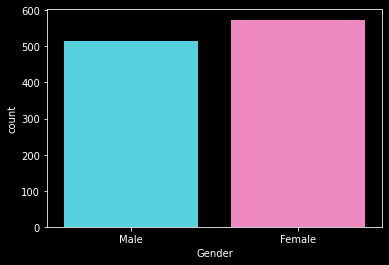

In [73]:
sns.countplot(x=df['Gender'], palette=GENDER_PALETTE)

There isn't a significant but a subtle difference in the gender ratio. Let us assume that

$H_0 = $ Null hypothesis : There isn't a difference based on gender this is just due to chance alone that the data is skewed.

$H_1 = $ Alternate hypothesis: The skewed diffference is significant and isn't due to chance there is a reason for this behaviour.

$ \alpha = 0.05 $

we are gonna use **Z-test** for this 
$\LARGE{
    z = \frac{ \hat{p}_1 - \hat{p}_2}
             {\sqrt{\hat{p} (1-\hat{p}) (\frac{1}{n_1} + \frac{1}{n_2})}}
}$

where, 
- $\hat{p}$ = sample size proportion
- $\hat{p}_1$ = proportion of one variable
- $\hat{p}_2$ = proportion of the other variable
- $n_1$ = number of observations in the first variable
- $n_2$ = number of observations in the second variable

In [96]:
gender_df = df["Gender"]
gender_df.head()

0      Male
1    Female
2    Female
3      Male
4    Female
Name: Gender, dtype: object

In [97]:
# caluculating the populations 
n_females = gender_df[gender_df == "Female"].shape[0]
n_males   = gender_df.shape[0] - n_females
n_total   = (n_females+n_males)

In [98]:
# caluculating the probability distributions
p_females = n_females/ n_total
p_men = 1-p_females

p̂ = ((n_females*p_females) + (n_males*p_men))/n_total

In [99]:
# caluculating the z score
from math import sqrt
z = (p_females-p_men)/\
    sqrt(p̂*(1-p̂) *((1/n_females)+(1/n_males)))

In [100]:
# Getting the p-value from the z score
from scipy.stats import norm
p_val = norm.sf(abs(z))*2
print(p_val)


0.06933088368057078


### **Obseration:**
**From the above test we concluded that our p-value is 0.069 > 0.05, therefore we accept the null hypothesis.
Therefore, the skewed difference isn't significant.**

In [94]:
# Flusing all the variables 
del p_val, z
del p_females, p_men, p̂
del n_females, n_males, n_total
del gender_df

## Analyzing two categorical variables (Gender, Age groups)

Q: Does the proportion of males and females differ across age groups ? 


<AxesSubplot:xlabel='Age Group', ylabel='count'>

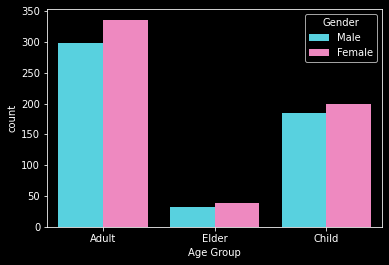

In [103]:
sns.countplot(x='Age Group', hue="Gender", data=df, palette=GENDER_PALETTE)

- $ H_0 = $ Null Hypothesis: The number of male and female doesn't depend on age groups. 
- $ H_1 = $ Alternate Hypothesis: The number of male and female depend on age groups.
- $ \alpha = 0.05 $

We're gonna use **$Chi^2$** test

In [104]:
col_1, col_2 = "Age Group", "Gender"
cross_table = pd.crosstab(df[col_1], df[col_2])
print(cross_table)

del col_1, col_2

Gender     Female  Male
Age Group              
Adult         336   298
Child         200   184
Elder          38    32


In [108]:
from scipy.stats import chi2_contingency

chi2, p_val, degree_of_freedom, expected =chi2_contingency(cross_table)
print(p_val)

del p_val, degree_of_freedom, expected, chi2, cross_table


0.9276562236119399


### **Observation :**

**As we can observe the p-value is $ 0.93 > \alpha = 0.05 $ therefore, we accept our null hypothesis.**

## Analyzing a continious variable (height)
Q: Is the average height is differnet from a previouly observed value ?

In [107]:
from scipy.stats import ttest_1samp

mean_height = df['height'].mean()
sample_data  = np.random.choice(df['height'], 50)

t_stat, p_value = ttest_1samp(sample_data, mean_height)
print(p_value)

del mean_height, sample_data, t_stat, p_value

0.8464080628295445


### **Observation :**

**As we can observe the p-value is $ 0.85 > \alpha = 0.05 $ therefore, we accept our null hypothesis.**

## Analyzing a Categoric and numeric variable (Gender-Height)
Q: Is there a difference between average height of men and women

We're gonna use **T-test**

<AxesSubplot:>

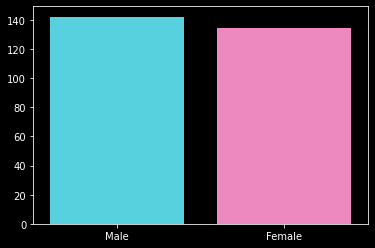

In [113]:
men_heights = df[df["Gender"]=="Male"]['height']
women_heights = df[df["Gender"]=="Female"]['height']

avg_men, avg_women = men_heights.mean(), women_heights.mean()

sns.barplot(x=["Male", "Female"], y = [avg_men, avg_women], palette=GENDER_PALETTE)

In [114]:
from scipy.stats import ttest_ind
_, p_value = ttest_ind(men_heights, women_heights, equal_var=False)

print(p_value)

4.612364700286699e-06


### **Observation :**

**As we can observe the p-value is $ 4.6\times 10^{-6} < \alpha = 0.05 $ therefore, we accept our null hypothesis.**

In [115]:
del p_value, avg_men, avg_women
del men_heights, women_heights

## Analyzing two numberic variables (height-weight)
Q: Is there a relationship between the two variables ? 

We're gonna use **Corelation-test**

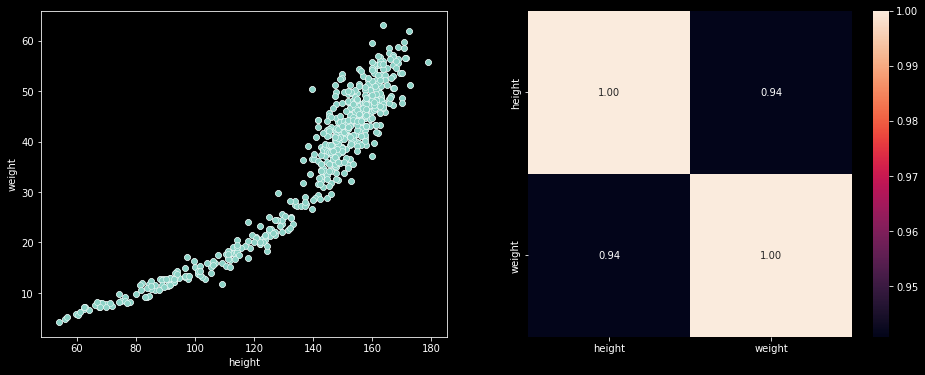

In [123]:
import seaborn as sns

height_weight = df[['height', 'weight']]
cm = height_weight.corr()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.scatterplot(x="height", y="weight", data=df,ax=ax[0])
sns.heatmap(cm, annot=True, fmt='.2f', ax=ax[1] )

del height_weight, cm
del fig, ax

### **Observation :**
**From the above co-relation heat map we can see that there is a strong correlation between the two variables.**